# 4$^{th}$ Order Runge-Kutta Method

In [224]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    if type(y0) == float:
        N = 1
    else:
        N = y0.shape[0]
    yn = np.zeros((n+1, N))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

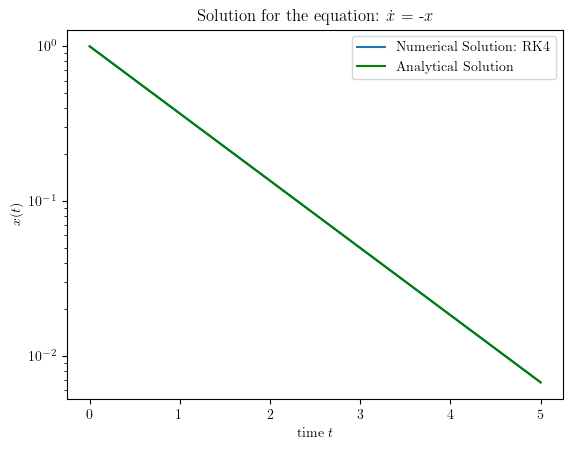

In [246]:
#nummerical solution for the ODE: $\dot{x} = -x$
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
def f_0(y,x,**f_args):
    return -y

%matplotlib inline    
yn,xn = rk4(1.,0.,f_0,0.01,int(5/0.01))
plt.plot(xn,yn, label = 'Numerical Solution: RK4')

#analytical solution to the problem
def f_01(x):
    return np.exp(-x)
t = np.linspace(0,5,int(5/0.01))
plt.plot(t,f_01(t), color = "green", label = 'Analytical Solution')
plt.yscale('log')
plt.title(r'Solution for the equation: $\dot{x}$ = -$x$')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'time $t$')
plt.legend()

In [252]:
def comparition(y0,x0,f,h,e,f_args = {}):
    n = int(e/h)
    
    #nummerical solution
    yn, xn = rk4(y0,x0,f,h,n,f_args={})
    fig1, ax1 = plt.subplots()
    ax1.plot(xn,yn, label = r'Numerical Solution: RK4 with $\Delta$ $h$ = {}'.format(h))
    
    #analytical solution
    def f_1(x):
        return np.exp(-x)
    t = np.linspace(0,e,n)
    ax1.plot(t,f_1(t), color = "green", label = 'Analytical Solution')
    plt.yscale('log')
    plt.title(r'Solution for the equation: $\dot{x}$ = -$x$')
    plt.legend()
    plt.ylabel(r'$x(t)$')
    plt.xlabel(r'time $t$')

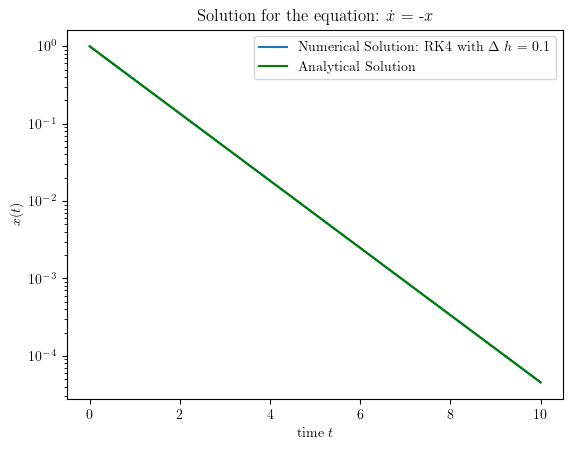

In [253]:
comparition(1.,0.,f_0,0.1,10)

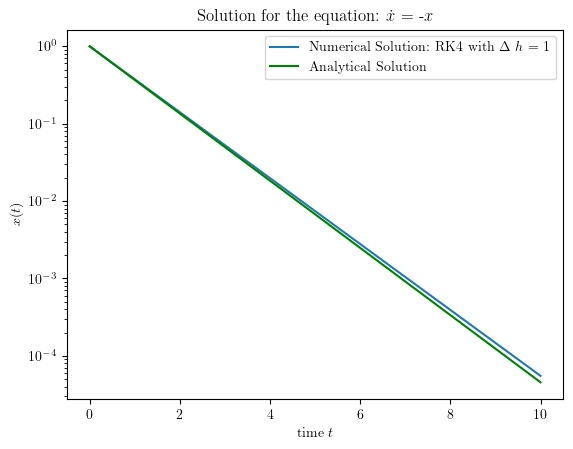

In [254]:
comparition(1.,0.,f_0,1,10)

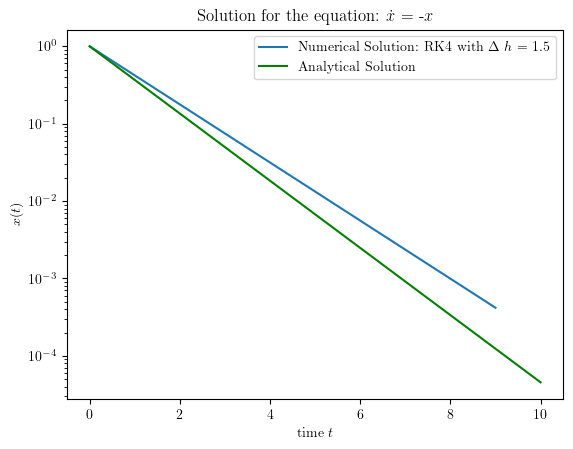

In [255]:
comparition(1.,0.,f_0,1.5,10)

# Three-Body Problem

In [240]:
#defining the derivations for the three bodies
def f_1(y,x,m):
    return -m[1]*(y[0]-y[1])/np.linalg.norm(y[0]-y[1])**2 - m[2]*(y[0]-y[2])/np.linalg.norm(y[0]-y[2])**2

def f_2(y,x,m):
    return -m[0]*(y[1]-y[0])/np.linalg.norm(y[1]-y[0])**2 - m[2]*(y[1]-y[2])/np.linalg.norm(y[1]-y[2])**2

def f_3(y,x,m):
    return -m[1]*(y[2]-y[1])/np.linalg.norm(y[2]-y[1])**2 - m[0]*(y[2]-y[0])/np.linalg.norm(y[2]-y[0])**2

def x_dot(v,x,m):
    return v
# defining a new rk4-step for the 2. Order ODE
def rk4_step_three_body(y0, x0, v0,f, h, m):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y0    - 3 x 2 numpy array specifying initial position of the 3 bodies of the ODE at the current time step
            v0    - 3 x 2 numpy array specifying initial velocity of the 3 bodeis
            x0    - current time step
            f      -3 x 1 numpy array containint the functions that calculates the derivates of all variables of the ODE
            h      - time step size
            m      - 3 x 1 numpy array that contains the masses of the 3 bodiesnction f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    
    k1v = np.array([h * f[i](y0,x0,m) for i in range(0,3)])
    k1x = h*f[3](v0, x0, m)
    
    k2x = h * f[3](v0 + k1x/2.0, x0 + h/2.0, m)
    k2v = np.array([h * f[i](y0 + k1v[i]/2.0, x0 + h/2.0, m) for i in range(0,3)])
    
    k3x = h * f[3](v0 + k2x/2., x0 + h/2., m)
    k3v = np.array([h * f[i](y0 + k2v[i]/2., x0 + h/2., m) for i in range(0,3)])

    k4x = h * f[3](v0 + k3x, x0 + h, m)
    k4v = np.array([h * f[i](y0 + k3v[i], x0 + h, m) for i in range(0,3)])

    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1x + 2.*k2x + 2.*k3x + k4x)
    vp1 = v0 + 1./6.*(k1v + 2.*k2v + 2.*k3v + k4v)
    
    return vp1,yp1,xp1

In [256]:
def tbp_orbit(y0, v0, x0, f, h, e, m):
    n = int(e/h)
    
    ''' Simple implementation of RK4
        Inputs:
            y0    - 3 x 2 numpy array specifying initial position of the 3 bodies of the ODE at the current time step
            v0    - 3 x 2 numpy array specifying initial velocity of the 3 bodeis
            x0    - current time step
            f      -3 x 1 numpy array containint the functions that calculates the derivates of all variables of the ODE
            h      - time step size
            e      - upper limit for the time
            m      - 3 x 1 numpy array that contains the masses of the 3 bodies
        Outputs:
            yn - N+1 x 2 numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, 3, 2))
    vn = np.zeros((n+1, 3, 2))
    xn = np.zeros((n+1,1))
    vn[0,:] = v0
    yn[0,:] = y0
    xn[0,:] = x0
    
    
    for i in np.arange(1,n+1,1):
        
        vn[i,:], yn[i,:], xn[i] = rk4_step_three_body(y0 = yn[i-1,:], x0 = xn[i-1], v0 = vn[i-1,:], f = f, h = h, m= m)
        
    plt.plot(yn[:,0,0], yn[:,0,1], label = '1st body')
    plt.plot(yn[:,1,0], yn[:,1,1], label = '2st body')
    plt.plot(yn[:,2,0], yn[:,2,1], label = '3st body')
    plt.legend()
    plt.title(r'Orbit of three bodies')
    plt.ylabel(r'$x(t)$')
    plt.xlabel(r'$y(t)$')
    

## _a)_

In [261]:
y0 = np.array([[0.97000436,-0.24308753], [-0.46620368, -0.43236573], [0.0,0.0]])
v0 = np.array([[0.93240737, 0.86473146], [-0.97000436, 0.24308753],[-0.46620368, -0.43236573]])
f = np.array([f_1,f_2,f_3,x_dot])
m = np.array([1,1,1,1])

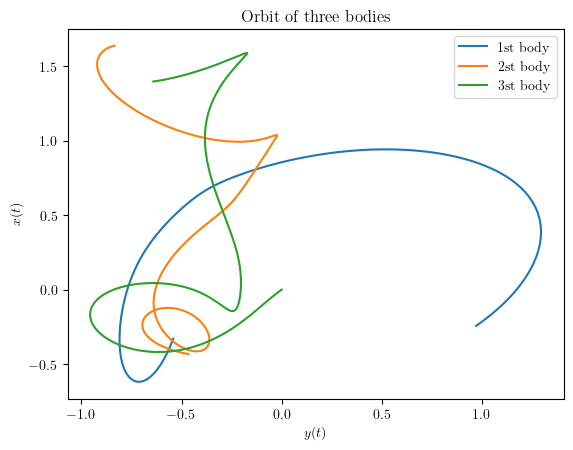

In [262]:
tbp_orbit(y0 = y0,v0 = v0, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.001, e = 5, m =m)

## _b)_

In [259]:
m1 = np.array([5,4,3])
v1 = np.array([[0.0], [0.0], [0.0]])
y1 = np.array([[np.sqrt(2), 0],[-np.sqrt(2)/2,3*np.sqrt(2)/2],[-np.sqrt(2), -2*np.sqrt(2)]])
v1 = np.array([[0.0,0.0], [0.0,0.0],[0.0,0.0]])

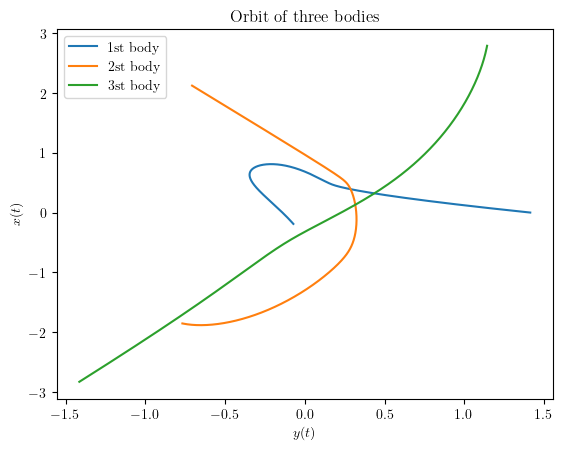

In [260]:
tbp_orbit(y0 = y1,v0 = v1, x0 = 0,f = np.array([f_1,f_2,f_3,x_dot]), h = 0.001, e = 2.5, m =m1)